In [1]:
import torch
import numpy as np
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from anndata import AnnData
from sklearn.decomposition import PCA

In [ ]:
gene_name = []
results = []

with open('perturb_and_result_list.txt', 'r', encoding='utf-8') as f:
    for line in f:
        # 解析每一行，提取基因名和结果
        gene_part, result_part = line.split(', Result: ')
        gene = gene_part.split(': ')[1]  # 获取基因名
        result_str = result_part.strip()  # 去掉空白字符

        # 处理结果，将字符串转换为列表
        result = eval(result_str)  # 使用 eval 将字符串转换为列表

        # 将数据添加到对应的列表
        gene_name.append(gene)
        results.append(result)

In [3]:
results = np.array(results)

In [6]:
np.shape(results)

(380, 100)

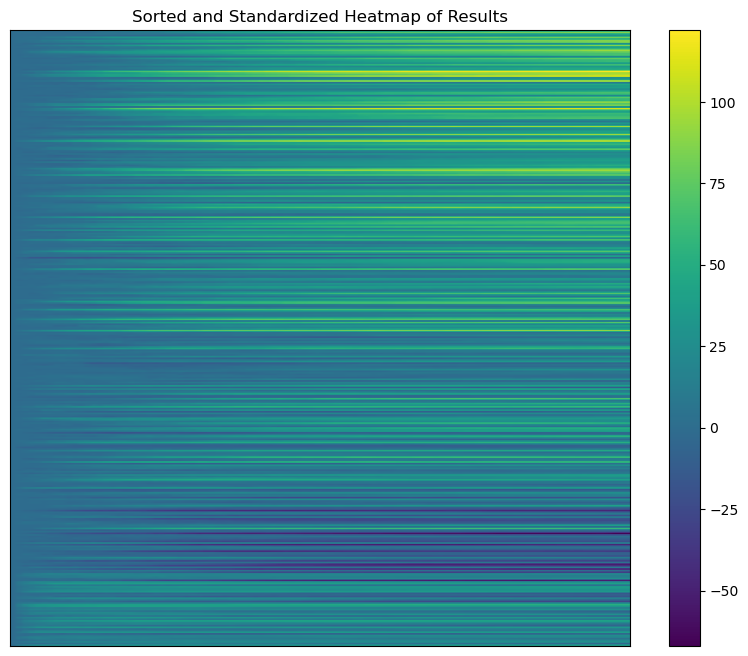

In [8]:
# Step 1: 按照每组的第一个值排序
sorted_results = results[results[:, 0].argsort()]

# Step 2: 标准化：每一列的所有值减去该列的第一个值
standardized_results = sorted_results - sorted_results[:, 0][:, np.newaxis]

# Step 3: 设置图形大小
plt.figure(figsize=(10, 8))

# 绘制热图，不展示 x 和 y 坐标标签
plt.imshow(standardized_results, cmap='viridis', aspect='auto')

# 隐藏 x 和 y 坐标标签
plt.xticks([])
plt.yticks([])

# 添加标题
plt.title('Sorted and Standardized Heatmap of Results')

# 显示颜色条
plt.colorbar()

# 显示图表
plt.show()

In [8]:
row_max_indices = np.argmax(results, axis=1)
print("每行最大值的索引:", row_max_indices)

每行最大值的索引: [23 98 78 96  0 79 85 79 99 90 20 86 14 84 61 70 98 92 65 92 48 89  7 79
 64 20 76  0 68 99 99 97 98 94 95  0 98 57 94 86 92 76 92 47  5 70 73 51
 71 91 97 94 99 95 67  0 96  0 75 94 96 79 14 97 25  2  2 98 96  9 92 86
 96 72 93 63 91 14 85 95 90 90 99  0 95 99 99 74 84 93 53 10  0 99 86 88
 57 38 69 99 91 91 69 99 42 93  0 97  0 90 98 99 97 91 99 99 36 76 72 64
 99 95 99 98 97 52 79 89  9 92 89 28 99 98 97 23 61 60 96 99 98 98 36 97
 99  0 96 94 88 95  1  0 98 83 96 91 99 76 95 72 98 93 40  5  2 95 66 99
 97 85 57  0 79  3 51 94  4 33 62 96 99 99 81 63 72 95 93  1 93 95 88 92
  0 56 99 95 97  0 89 17 60 98 89 88 56 70 99  0 13  6 99  2 86  2 90 95
 75 37 77 29 99  7 48 10 20 60 96 99 85  2 90 91 98 59 89 76 85 90 99  3
  0 99 36 88 16 91  2  8 90 94 98 93  3 37 99 97  4  0 97 88 88 96 84 41
 31 96 86 98 14 95 98 98 97 88 98 85 86 83 99 99 91 89 42 13  0 98 99 88
  0 87 28 23 99 92 75 94 82 91 15 58 94 41 70 59 99 97 32  4 97 89 88 11
 91 97  4 94 92 12 12 95 75 42 91 84 61 5

In [13]:
# 定义区间范围
bins = [0, 20, 40, 60, 80, 90, 95,97,100]

# 使用 pandas cut 函数将索引分段，并统计每段的频次
index_distribution = pd.cut(row_max_indices, bins=bins, right=True).value_counts()

print("每列最大值索引的分布:")
print(index_distribution)

每列最大值索引的分布:
(0, 20]      46
(20, 40]     20
(40, 60]     30
(60, 80]     46
(80, 90]     53
(90, 95]     58
(95, 97]     37
(97, 100]    64
Name: count, dtype: int64


In [26]:
bins = [50,75, 100,125, 150,175, 200]

# 使用 pandas 的 cut 函数将最大值分段，并统计每段的频次
distribution = pd.cut(row_max_values, bins=bins, right=True).value_counts()

print("每行最大值的分布统计:")
print(distribution)

每行最大值的分布统计:
(50, 75]       13
(75, 100]     102
(100, 125]    131
(125, 150]     81
(150, 175]     47
(175, 200]      6
Name: count, dtype: int64


每行最大值的分布统计:
(50, 75]       13
(75, 100]     102
(100, 120]    109
(120, 140]     73
(140, 160]     58
(160, 180]     24
(180, 200]      1
Name: count, dtype: int64


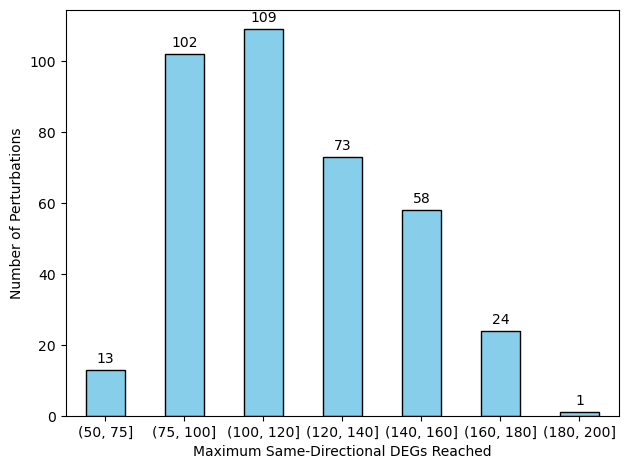

In [34]:
bins = [50,75, 100,120, 140,160,180, 200]

# 使用 pandas 的 cut 函数将最大值分段，并统计每段的频次
distribution = pd.cut(row_max_values, bins=bins, right=True).value_counts()

print("每行最大值的分布统计:")
print(distribution)
# 使用 pandas 的 cut 函数将最大值分段，并统计每段的频次
distribution = pd.cut(row_max_values, bins=bins, right=True).value_counts()

# 绘制柱状图
fig, ax = plt.subplots()
bars = distribution.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# 将 x 轴的坐标标签水平展示
plt.xticks(rotation=0)

# 在每个柱块上显示对应的值
ax.bar_label(bars.containers[0], label_type='edge', padding=3)

# 添加图表标题和轴标签
plt.xlabel('Maximum Same-Directional DEGs Reached')
plt.ylabel('Number of Perturbations')

# 显示图表
plt.tight_layout()  # 防止标签重叠

plt.savefig('max_same_directional_degs_reached_bar.pdf')

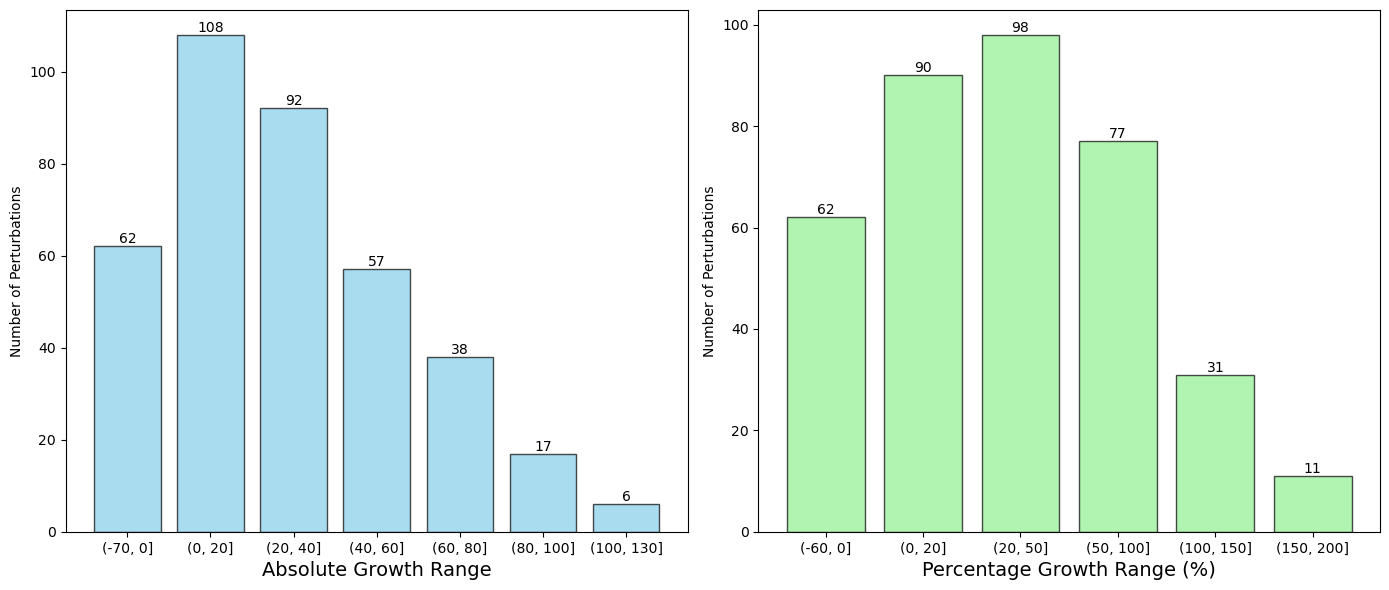

In [78]:
initial_values = results[:, 0]
final_values = results[:, -1]

absolute_growth = final_values - initial_values
percentage_growth = (absolute_growth / initial_values) * 100  # 增长百分比
# 设置范围分布
absolute_growth_bins = [-70, 0, 20,40,60,80,100,130]  # 生成 20 个区间
percentage_growth_bins = [-60, 0, 20,50,100,150,200]   # 生成 20 个区间

# 使用 pd.cut 计算每个区间的频数
distribution = pd.cut(absolute_growth, bins=absolute_growth_bins, right=True).value_counts().sort_index()
percentage_distribution = pd.cut(percentage_growth, bins=percentage_growth_bins, right=True).value_counts().sort_index()


# 设置直方图参数
plt.figure(figsize=(14, 6))

# 画绝对值增长的范围分布直方图
plt.subplot(1, 2, 1)  # 1行2列的第1个图
bars = plt.bar(distribution.index.astype(str), distribution.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Absolute Growth Range', fontsize=14)
plt.ylabel('Number of Perturbations')
plt.xticks(rotation=0)  # 使 x 轴标签倾斜，便于查看

# 在柱上显示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# 画百分比增长的范围分布直方图
plt.subplot(1, 2, 2)  # 1行2列的第2个图
bars = plt.bar(percentage_distribution.index.astype(str), percentage_distribution.values, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Percentage Growth Range (%)', fontsize=14)
plt.ylabel('Number of Perturbations')
plt.xticks(rotation=0)  # 使 x 轴标签倾斜，便于查看

# 在柱上显示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# 显示图表
plt.tight_layout()  # 优化布局
plt.savefig('growth_range_distribution_abs_perc.pdf')

In [53]:
distribution = pd.cut(absolute_growth, bins=absolute_growth_bins, right=True).value_counts()

In [66]:
negative_growth_indices = np.where(absolute_growth <= 0)
negative_growth_count = len(negative_growth_indices[0])

In [67]:
negative_growth_count

62

In [83]:
negative_growth_indices

(array([  4,  25,  27,  35,  55,  57,  62,  65,  66,  69,  83,  92, 106,
        108, 128, 135, 145, 150, 151, 163, 164, 171, 173, 176, 177, 187,
        192, 197, 207, 211, 213, 229, 239, 240, 246, 252, 253, 256, 257,
        264, 284, 288, 291, 298, 306, 307, 317, 326, 327, 335, 339, 341,
        346, 350, 353, 356, 359, 364, 368, 371, 372, 374], dtype=int64),)

In [86]:
bad_perturbation = [gene_name[i] for i in negative_growth_indices[0]]

In [88]:
bad_perturbation

62

In [89]:
adata = ad.read_h5ad('perturb_processed.h5ad')

In [95]:
num_unique_conditions = adata.obs['condition'].nunique()

# 输出结果
print(f'Number of unique conditions: {num_unique_conditions}')

Number of unique conditions: 1093


In [101]:
# 提取不同的标签
unique_conditions = adata.obs['condition'].unique()

# 移除单独的 'ctrl' 标签
filtered_conditions = [cond for cond in unique_conditions if cond != 'ctrl']

# 去掉 '+ctrl' 的部分，只保留基因名
gene_names = [cond.split('+')[0] for cond in filtered_conditions]

# 获取唯一的基因名
unique_gene_names = list(set(gene_names))

# 输出结果
print(f'Unique gene names: {unique_gene_names}')

Unique gene names: ['PSMD11', 'TPX2', 'COPS8', 'FARSA', 'COPS5', 'C12orf45', 'PELO', 'CCNK', 'MRPS34', 'PPIE', 'LTV1', 'TMX2', 'TTI1', 'IPO9', 'EIF3G', 'INTS1', 'TARS', 'FAU', 'EIF2B2', 'ACTR6', 'WDR61', 'RRS1', 'RARS', 'PDCD11', 'MRPL2', 'PRRC2A', 'MRPL13', 'LSM10', 'MRPS10', 'DDB1', 'ATR', 'ATP6V1B2', 'MAK16', 'UBE2I', 'DIMT1', 'CPSF6', 'PELP1', 'PSMB2', 'HARS', 'SNRPF', 'PHAX', 'GOLT1B', 'MRPL14', 'CHAF1B', 'RPL35', 'NOL6', 'CWC22', 'NUP85', 'SART1', 'FAM136A', 'MNAT1', 'CSNK1A1', 'WDR82', 'CDC73', 'STRAP', 'CNOT3', 'ARL2', 'RPL18', 'IARS', 'MCM6', 'MAU2', 'MED12', 'TMSB10', 'RANGAP1', 'RBMX2', 'TTC27', 'UTP15', 'THOC6', 'TPR', 'SIN3A', 'CENPJ', 'DHODH', 'SRFBP1', 'RPL39', 'GTF2A2', 'BGLAP', 'MDN1', 'TCOF1', 'POLR2F', 'NUDC', 'SNAPC3', 'C7orf26', 'EBNA1BP2', 'RPF1', 'PMF1', 'VPS54', 'SMN2', 'AATF', 'RPS4X', 'SART3', 'NUP54', 'RPS3A', 'DDX59', 'ESF1', 'EIF2B4', 'NCAPH', 'EIF1AX', 'RNF113A', 'TOMM40', 'BNIP1', 'CHERP', 'POLD1', 'TBP', 'SYMPK', 'ATF5', 'DARS', 'ARPC4', 'EIF4G2', 'TXN',

In [105]:
overlapping_labels = set(bad_perturbation).intersection(unique_gene_names)

# 获取重合的数量
num_overlapping = len(overlapping_labels)

# 输出结果
print(f'Overlapping labels: {overlapping_labels}')
print(f'Number of overlapping labels: {num_overlapping}')

Overlapping labels: {'RRP12', 'CNOT1', 'WDR12', 'FAM32A', 'LTV1', 'NOL11', 'POLRMT', 'AATF', 'DNTTIP2', 'YEATS2', 'SDAD1', 'BOP1', 'MAK16', 'PCID2', 'DDX24', 'RSL1D1', 'EIF3H', 'NLE1', 'POLA2', 'RPL37', 'DHX37', 'PSMD1', 'NIP7', 'PMPCB', 'HMGCS1', 'CCDC86', 'NCL', 'WDR3', 'WDR36', 'RPL11', 'RPL24', 'KRR1', 'NIFK', 'RPL21', 'IK', 'TEFM', 'ZNF574', 'GNL2', 'RIOK1', 'PSMD12', 'PSMD4', 'FBXO5', 'TSR2', 'RAD51', 'FCF1'}
Number of overlapping labels: 45


In [36]:

negative_growth_indices = np.where(absolute_growth < 0)[0]

# 输出负增长的索引
print("负增长的索引:", negative_growth_indices)

负增长的索引: [  4  25  27  35  55  57  62  65  66  69  83  92 106 108 128 135 145 150
 151 163 164 171 173 176 177 187 192 197 207 211 213 229 239 240 246 253
 256 257 264 284 288 291 298 306 307 317 326 327 335 339 341 346 350 353
 356 359 364 368 371 374]


In [107]:
bad_results = results[negative_growth_indices, :]
bad_results

array([[[ 94,  89,  87, ...,  90,  90,  91],
        [110, 110, 110, ..., 105, 105, 105],
        [124, 123, 119, ...,  83,  83,  83],
        ...,
        [117, 117, 116, ..., 110, 110, 110],
        [ 82,  84,  84, ...,  81,  81,  82],
        [ 87,  87,  87, ...,  86,  86,  86]]])

In [2]:
gene_name = []
prc_results = []
with open('logfc_result_and_result_list.txt', 'r', encoding='utf-8') as f:
    for line in f:
        # 解析每一行，提取基因名和结果
        gene_part, result_part = line.split(', Result: ')
        gene = gene_part.split(': ')[1]  # 获取基因名
        result_str = result_part.strip()  # 去掉空白字符

        # 处理结果，将字符串转换为列表
        result = eval(result_str)  # 使用 eval 将字符串转换为列表

        # 将数据添加到对应的列表
        gene_name.append(gene)
        prc_results.append(result)

In [3]:
prc_results = np.array(prc_results)

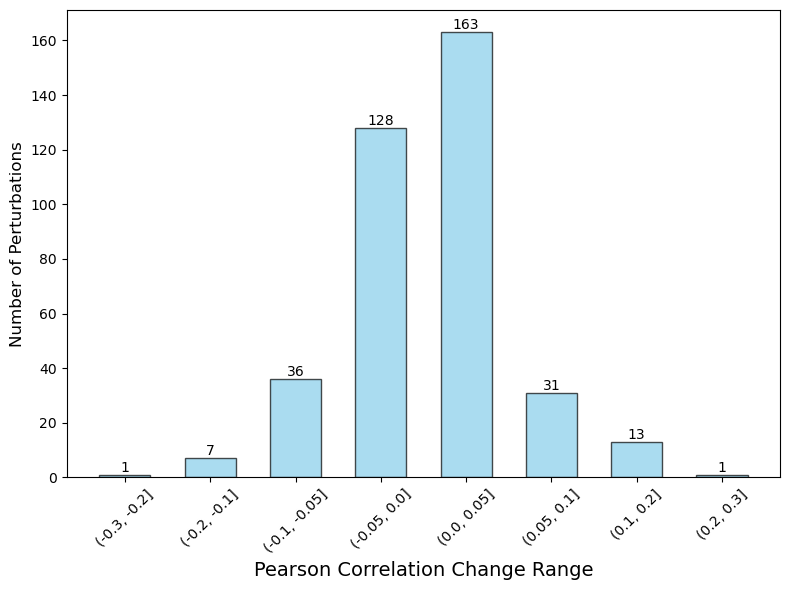

In [16]:
diff = prc_results[:, -1] - prc_results[:, 0]

prc_bins = [-0.3, -0.2, -0.1,-0.05,0, 0.05, 0.1, 0.2, 0.3]

# Step 2: Use pd.cut to calculate the frequency of values in each bin
prc_distribution = pd.cut(diff, bins=prc_bins, right=True).value_counts().sort_index()

# Step 3: Set up the bar plot parameters
plt.figure(figsize=(8, 6))

bar_width = 0.6  # Set the bar width

# Step 4: Create the bar plot
bars = plt.bar(prc_distribution.index.astype(str), prc_distribution.values, width=bar_width, color='skyblue', edgecolor='black', alpha=0.7)

# Step 5: Add labels and formatting
plt.xlabel('Pearson Correlation Change Range', fontsize=14)
plt.ylabel('Number of Perturbations', fontsize=12)
plt.xticks(rotation=45)  # Keep the x-axis labels horizontal
# 在每个柱子上显示数值
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # 在柱子上方显示数值

# Show the plot
plt.tight_layout()
plt.savefig('prc_change_distribution.pdf')
plt.show()

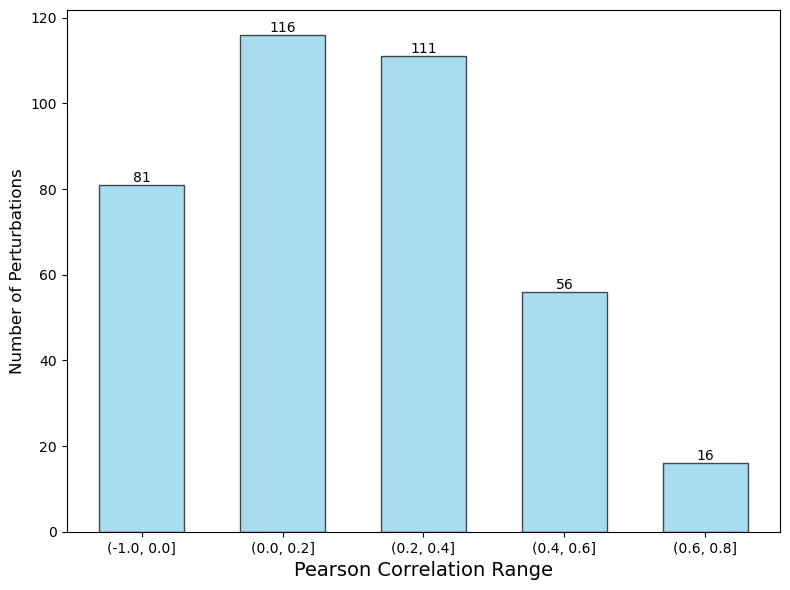

In [123]:
final_prc_values = prc_results[:, -1]


# 自定义区间
prc_bins = [-1, 0, 0.2, 0.4, 0.6, 0.8]  # 根据需要自定义的区间

# 使用 pd.cut 计算每个区间的频数
prc_distribution = pd.cut(final_prc_values, bins=prc_bins, right=True).value_counts().sort_index()

# 设置柱状图参数
plt.figure(figsize=(8, 6))

bar_width = 0.6  # 设置柱宽

bars = plt.bar(prc_distribution.index.astype(str), prc_distribution.values, width=bar_width, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Pearson Correlation Range', fontsize=14)
plt.ylabel('Number of Perturbations', fontsize=12)
plt.xticks(rotation=0)  # 使 x 轴标签倾斜，便于查看

# 在每个柱子上显示数值
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # 在柱子上方显示数值

# 显示图表
plt.tight_layout()  # 优化布局
plt.savefig('final_prc_distribution.pdf')

In [124]:
initial_values = prc_results[:, 0]
final_values = prc_results[:, -1]

# 计算增长
growth = final_values - initial_values

# 统计增长的数量
growth_count = np.sum(growth > 0)  # 计算大于 0 的数量

# 输出结果
print(f'Number of perturbations with growth: {growth_count}')

Number of perturbations with growth: 208


d:\anaconda\Lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


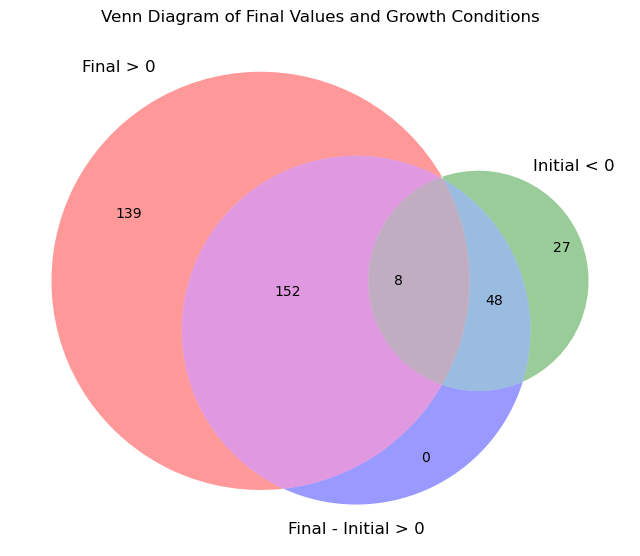

In [127]:
from matplotlib_venn import venn3
# 条件判断
set1 = final_values > 0               # final value > 0
set2 = initial_values < 0             # initial < 0
set3 = final_values - initial_values > 0  # final - initial > 0

# 统计满足条件的数量
only_set1 = np.sum(set1 & ~set2 & ~set3)  # 仅满足 final > 0
only_set2 = np.sum(set2 & ~set1 & ~set3)  # 仅满足 initial < 0
only_set3 = np.sum(set3 & ~set1 & ~set2)  # 仅满足 final - initial > 0
both_sets1_and2 = np.sum(set1 & set2 & ~set3)  # final > 0 且 initial < 0
both_sets1_and3 = np.sum(set1 & set3 & ~set2)  # final > 0 且 final - initial > 0
both_sets2_and3 = np.sum(set2 & set3 & ~set1)  # initial < 0 且 final - initial > 0
all_sets = np.sum(set1 & set2 & set3)          # final > 0 且 initial < 0 且 final - initial > 0

# 绘制韦恩图
plt.figure(figsize=(8, 8))
venn_counts = {
    '100': only_set1,
    '010': only_set2,
    '001': only_set3,
    '110': both_sets1_and2,
    '101': both_sets1_and3,
    '011': both_sets2_and3,
    '111': all_sets
}
venn3(subsets=venn_counts, set_labels=('Final > 0', 'Initial < 0', 'Final - Initial > 0'))

# 添加标题
plt.title('Venn Diagram of Final Values and Growth Conditions')

# 显示图表
plt.show()